In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [97]:
car_train_df = pd.read_csv('./car_evaluation_train.csv', sep=',')
print("Tập train có kích thước là:", car_train_df.shape)
car_train_df.head()

Tập train có kích thước là: (1382, 7)


,buying,maint,doors,persons,lug_boot,safety,class
0,med,low,2,4,big,low,unacc
1,low,high,5more,more,med,low,unacc
2,high,high,4,4,small,low,unacc
3,low,low,2,2,med,low,unacc
4,med,med,3,more,small,low,unacc


In [98]:
car_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1382 non-null   object
 1   maint     1382 non-null   object
 2   doors     1382 non-null   object
 3   persons   1382 non-null   object
 4   lug_boot  1382 non-null   object
 5   safety    1382 non-null   object
 6   class     1382 non-null   object
dtypes: object(7)
memory usage: 75.7+ KB


<AxesSubplot:>

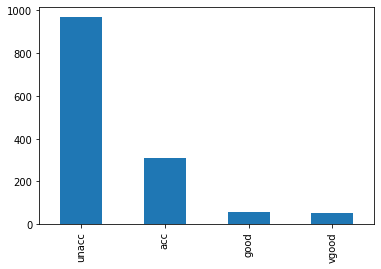

In [99]:
car_train_df.iloc[:, -1].value_counts().plot(kind='bar')

In [100]:
car_test_df = pd.read_csv('./car_evaluation_test.csv', sep=',')
print("Tập test có kích thước là:", car_test_df.shape)
car_test_df.head()

Tập test có kích thước là: (346, 7)


,buying,maint,doors,persons,lug_boot,safety,class
0,high,low,3,2,big,med,unacc
1,med,med,3,more,med,low,unacc
2,med,med,2,2,big,high,unacc
3,high,med,2,4,small,med,unacc
4,high,vhigh,2,more,med,low,unacc


In [101]:
car_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    346 non-null    object
 1   maint     346 non-null    object
 2   doors     346 non-null    object
 3   persons   346 non-null    object
 4   lug_boot  346 non-null    object
 5   safety    346 non-null    object
 6   class     346 non-null    object
dtypes: object(7)
memory usage: 19.0+ KB


<AxesSubplot:>

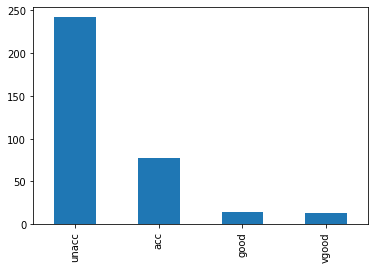

In [102]:
car_test_df.iloc[:, -1].value_counts().plot(kind='bar')

In [103]:
len(car_test_df[car_test_df.iloc[:, -1] == 'vgood'])

13

In [104]:
car_train_data = pd.get_dummies(car_train_df.iloc[:, :-1], drop_first=True).to_numpy()
car_train_target = car_train_df.iloc[:, -1].to_numpy()

car_test_data = pd.get_dummies(car_test_df.iloc[:, :-1], drop_first=True).to_numpy()
car_test_target = car_test_df.iloc[:, -1].to_numpy()

In [105]:
decision_tree_clf = tree.DecisionTreeClassifier(criterion='entropy')
decision_tree_clf.fit(car_train_data, car_train_target)
y_pred = decision_tree_clf.predict(car_test_data)

print("Accuracy score:", accuracy_score(y_pred, car_test_target))

Accuracy score: 0.9248554913294798


<AxesSubplot:title={'center':'Confusion Matrix For Test'}>

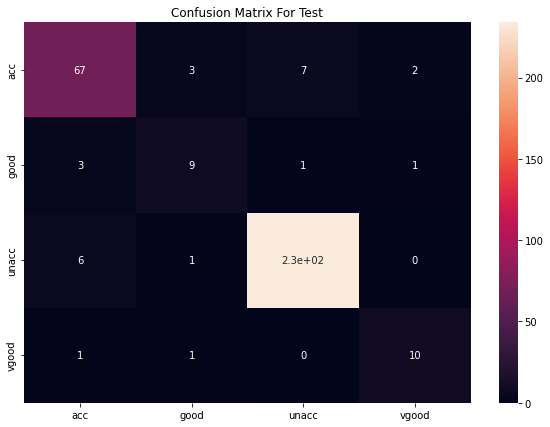

In [106]:
c_matrix = confusion_matrix(y_pred, car_test_target)
labels = np.unique(car_test_target).tolist()
c_matrix_df = pd.DataFrame(c_matrix, index = labels, columns=labels)
plt.figure(figsize=(10, 7))
plt.title("Confusion Matrix For Test")
sns.heatmap(c_matrix_df, annot=True)

In [107]:
from sklearn.tree import export_graphviz

dot_file_output_path = 'car_evaluation_tree.dot'

dot_data = export_graphviz(decision_tree_clf, out_file=dot_file_output_path, feature_names=pd.get_dummies(car_train_df.iloc[:, :-1], drop_first=True).columns)

In [ ]:
# If you configured dot in System Environment
system(dot -Tpng car_evaluation_tree.dot -o car_evaluation_tree.png)

# Else run code below:

"""
    from graphviz import Source
    s = Source.from_file(dot_file_output_path)
    s.render('car_evaluation_tree', format='jpg',view=True)

"""